In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('1DataCoSupplyChainDataset.csv',encoding='latin-1')
df.head(50)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4.0,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4.0,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4.0,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4.0,NaN,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4.0,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4.0,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1.0,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1.0,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 10:21,First Class
8,CASH,3,2.0,NaN,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 10:00,Second Class
9,CASH,2,1.0,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 9:39,First Class


### ------------------- DATA CLEANING AND EDA  -----------------------


In [3]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [4]:
dfTemp = df[['order date (DateOrders)','Order Item Total','Order Item Id','Product Card Id',
            'Customer Id','Customer Segment',
            'Days for shipping (real)','shipping date (DateOrders)',
            'Product Price','Shipping Mode','Type','Order Item Quantity','Order Item Discount','Order Profit Per Order']].copy()
dfTemp.head(50)

,order date (DateOrders),Order Item Total,Order Item Id,Product Card Id,Customer Id,Customer Segment,Days for shipping (real),shipping date (DateOrders),Product Price,Shipping Mode,Type,Order Item Quantity,Order Item Discount,Order Profit Per Order
0,1/31/2018 22:56,314.640015,180517.0,1360,20755.0,Consumer,3,02-03-2018 22:56,327.750000,Standard Class,DEBIT,1,13.110000,91.250000
1,1/13/2018 12:27,311.359985,179254.0,1360,19492.0,Consumer,5,1/18/2018 12:27,327.750000,Standard Class,TRANSFER,1,16.389999,-249.089996
2,1/13/2018 12:06,309.720001,179253.0,1360,19491.0,Consumer,4,1/17/2018 12:06,327.750000,Standard Class,CASH,1,18.030001,-247.779999
3,1/13/2018 11:45,304.809998,179252.0,1360,19490.0,Home Office,3,1/16/2018 11:45,327.750000,Standard Class,DEBIT,1,22.940001,22.860001
4,1/13/2018 11:24,298.250000,179251.0,1360,19489.0,Corporate,2,1/15/2018 11:24,327.750000,Standard Class,PAYMENT,1,29.500000,134.210007
5,1/13/2018 11:03,294.980011,179250.0,1360,19488.0,Consumer,6,1/19/2018 11:03,327.750000,Standard Class,TRANSFER,1,32.779999,18.580000
6,1/13/2018 10:42,288.420013,179249.0,1360,19487.0,Home Office,2,1/15/2018 10:42,327.750000,First Class,DEBIT,1,39.330002,95.180000
7,1/13/2018 10:21,285.140015,179248.0,1360,19486.0,Corporate,2,1/15/2018 10:21,327.750000,First Class,TRANSFER,1,42.610001,68.430000
8,1/13/2018 10:00,278.589996,179247.0,1360,19485.0,Corporate,3,1/16/2018 10:00,327.750000,Second Class,CASH,1,49.160000,133.720001
9,1/13/2018 9:39,275.309998,179246.0,1360,19484.0,Corporate,2,1/15/2018 9:39,327.750000,First Class,CASH,1,52.439999,132.149994


In [5]:
dfTemp.columns

Index(['order date (DateOrders)', 'Order Item Total', 'Order Item Id',
       'Product Card Id', 'Customer Id', 'Customer Segment',
       'Days for shipping (real)', 'shipping date (DateOrders)',
       'Product Price', 'Shipping Mode', 'Type', 'Order Item Quantity',
       'Order Item Discount', 'Order Profit Per Order'],
      dtype='object')

In [6]:
dfTemp.rename(
    columns={'order date (DateOrders)':"Order Date", 'Order Item Total':'Order Total','Product Card Id':'Product Id',
             'Days for shipping (real)':'Shipping Duration','Order Profit Per Order':'Profit Per Order','shipping date (DateOrders)':'Shipping Date',
             'Order Item Discount':'Total Discount','Order Item Quantity':'Total Quantity','Type':'Payment Type'
            },
    inplace = True
)

In [7]:
dfTemp.head(50)

,Order Date,Order Total,Order Item Id,Product Id,Customer Id,Customer Segment,Shipping Duration,Shipping Date,Product Price,Shipping Mode,Payment Type,Total Quantity,Total Discount,Profit Per Order
0,1/31/2018 22:56,314.640015,180517.0,1360,20755.0,Consumer,3,02-03-2018 22:56,327.750000,Standard Class,DEBIT,1,13.110000,91.250000
1,1/13/2018 12:27,311.359985,179254.0,1360,19492.0,Consumer,5,1/18/2018 12:27,327.750000,Standard Class,TRANSFER,1,16.389999,-249.089996
2,1/13/2018 12:06,309.720001,179253.0,1360,19491.0,Consumer,4,1/17/2018 12:06,327.750000,Standard Class,CASH,1,18.030001,-247.779999
3,1/13/2018 11:45,304.809998,179252.0,1360,19490.0,Home Office,3,1/16/2018 11:45,327.750000,Standard Class,DEBIT,1,22.940001,22.860001
4,1/13/2018 11:24,298.250000,179251.0,1360,19489.0,Corporate,2,1/15/2018 11:24,327.750000,Standard Class,PAYMENT,1,29.500000,134.210007
5,1/13/2018 11:03,294.980011,179250.0,1360,19488.0,Consumer,6,1/19/2018 11:03,327.750000,Standard Class,TRANSFER,1,32.779999,18.580000
6,1/13/2018 10:42,288.420013,179249.0,1360,19487.0,Home Office,2,1/15/2018 10:42,327.750000,First Class,DEBIT,1,39.330002,95.180000
7,1/13/2018 10:21,285.140015,179248.0,1360,19486.0,Corporate,2,1/15/2018 10:21,327.750000,First Class,TRANSFER,1,42.610001,68.430000
8,1/13/2018 10:00,278.589996,179247.0,1360,19485.0,Corporate,3,1/16/2018 10:00,327.750000,Second Class,CASH,1,49.160000,133.720001
9,1/13/2018 9:39,275.309998,179246.0,1360,19484.0,Corporate,2,1/15/2018 9:39,327.750000,First Class,CASH,1,52.439999,132.149994


In [8]:
dfTemp.isnull().sum()

Order Date             0
Order Total          452
Order Item Id        439
Product Id             0
Customer Id          551
Customer Segment       0
Shipping Duration      0
Shipping Date          0
Product Price          0
Shipping Mode        679
Payment Type           0
Total Quantity         0
Total Discount         0
Profit Per Order       0
dtype: int64

<Axes: >

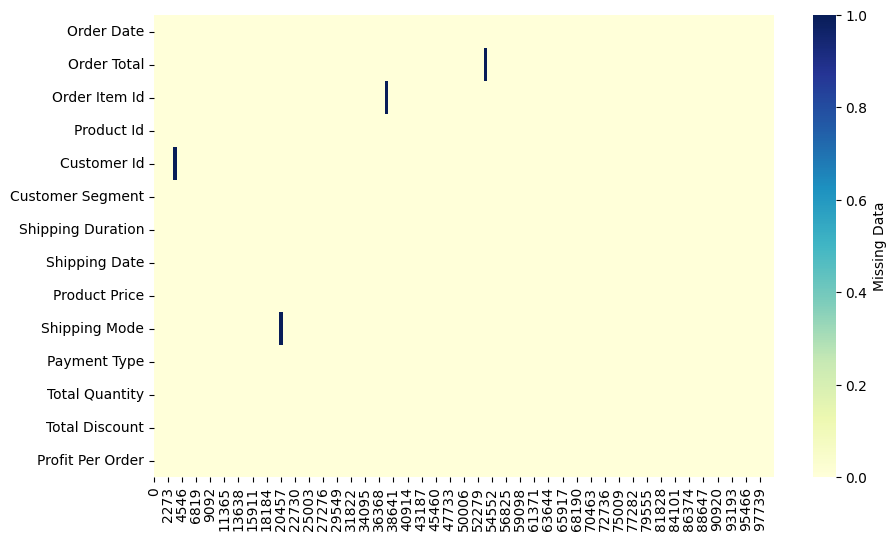

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(dfTemp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [10]:
dfTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order Date         99998 non-null  object 
 1   Order Total        99546 non-null  float64
 2   Order Item Id      99559 non-null  float64
 3   Product Id         99998 non-null  int64  
 4   Customer Id        99447 non-null  float64
 5   Customer Segment   99998 non-null  object 
 6   Shipping Duration  99998 non-null  int64  
 7   Shipping Date      99998 non-null  object 
 8   Product Price      99998 non-null  float64
 9   Shipping Mode      99319 non-null  object 
 10  Payment Type       99998 non-null  object 
 11  Total Quantity     99998 non-null  int64  
 12  Total Discount     99998 non-null  float64
 13  Profit Per Order   99998 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 10.7+ MB


In [11]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
dfTemp[['Customer Segment','Shipping Mode','Payment Type']]  = oe.fit_transform(dfTemp[['Customer Segment','Shipping Mode','Payment Type']])

In [12]:
from miceforest import ImputationKernel
ker = ImputationKernel(
    data = dfTemp.drop(['Order Date','Shipping Date'],axis=1),
    random_state=12345
)
ker.mice(3)
dfBase = ker.complete_data()

In [13]:
dfBase

,Order Total,Order Item Id,Product Id,Customer Id,Customer Segment,Shipping Duration,Product Price,Shipping Mode,Payment Type,Total Quantity,Total Discount,Profit Per Order
0,314.640015,180517.0,1360,20755.0,0.0,3,327.75,3.0,1.0,1,13.110000,91.250000
1,311.359985,179254.0,1360,19492.0,0.0,5,327.75,3.0,3.0,1,16.389999,-249.089996
2,309.720001,179253.0,1360,19491.0,0.0,4,327.75,3.0,0.0,1,18.030001,-247.779999
3,304.809998,179252.0,1360,19490.0,2.0,3,327.75,3.0,1.0,1,22.940001,22.860001
4,298.250000,179251.0,1360,19489.0,1.0,2,327.75,3.0,2.0,1,29.500000,134.210007
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,143.940002,95540.0,1014,2084.0,1.0,5,49.98,2.0,1.0,3,6.000000,64.769997
99994,181.929993,95536.0,1014,6098.0,0.0,1,49.98,1.0,1.0,4,17.990000,30.930000
99995,179.929993,95530.0,1014,3817.0,1.0,4,49.98,3.0,1.0,4,19.990000,-149.880005
99996,87.959999,95521.0,1014,8308.0,0.0,4,49.98,3.0,2.0,2,12.000000,-19.790001


In [14]:
dfBase['Order Date'] = (pd.to_datetime(dfTemp['Order Date'],format='mixed').dt.date).astype('datetime64[ns]')
dfBase['Shipping Date'] = (pd.to_datetime(dfTemp['Shipping Date'],format='mixed').dt.date).astype('datetime64[ns]')

In [15]:
dfBase['Order Total'] = round(dfBase['Order Total'],2)
dfBase['Total Discount'] = round(dfBase['Total Discount'],2)
dfBase['Profit Per Order'] = round(dfBase['Profit Per Order'],2)

<Axes: ylabel='Total Discount'>

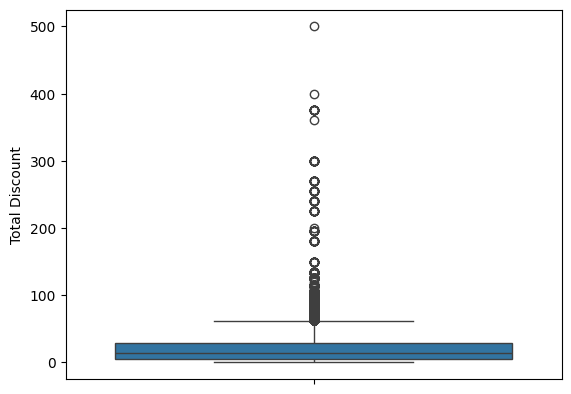

In [16]:
sns.boxplot(dfBase['Total Discount'])

In [63]:
dfBase['Total Discount'].describe()

count    99998.000000
mean        19.844732
std         21.322412
min          0.000000
25%          5.200000
50%         13.600000
75%         28.060000
max        500.000000
Name: Total Discount, dtype: float64

In [18]:
len(dfBase.loc[dfBase['Total Discount'] > 100])

376

In [19]:
upL = dfBase['Total Discount'].mean() + 3*dfBase['Total Discount'].std()
loL = dfBase['Total Discount'].mean() - 3*dfBase['Total Discount'].std()

print(upL,loL)

83.81196886263548 -44.12250427334368


<Axes: ylabel='Order Total'>

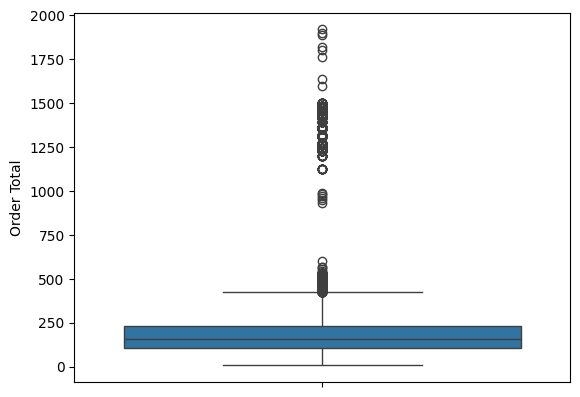

In [20]:
sns.boxplot(dfBase['Order Total'])

In [21]:
upL1 = dfBase['Order Total'].mean() + 3*dfBase['Order Total'].std()
loL1 = dfBase['Order Total'].mean() - 3*dfBase['Order Total'].std()

print(upL1,loL1)

532.1328261699043 -181.60214395626008


In [22]:
dfBase['Order Total'].describe()

count    99998.000000
mean       175.265341
std        118.955828
min          7.490000
25%        103.990000
50%        160.000000
75%        232.760000
max       1919.990000
Name: Order Total, dtype: float64

In [24]:
len(dfBase.loc[dfBase['Order Total'] > 532])

348

/tmp/ipykernel_5737/2511600155.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfBase['Order Total'])


<Axes: xlabel='Order Total', ylabel='Density'>

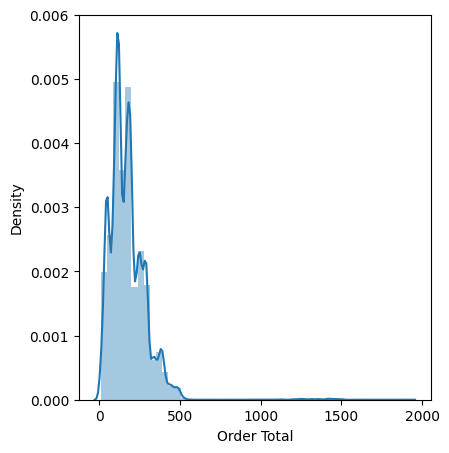

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(dfBase['Order Total'])

/tmp/ipykernel_5737/2246077416.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfBase['Profit Per Order'])


<Axes: xlabel='Profit Per Order', ylabel='Density'>

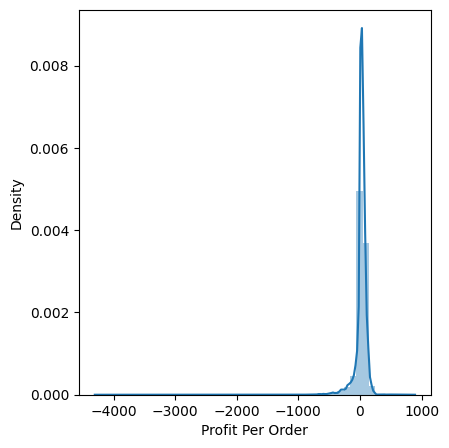

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(dfBase['Profit Per Order'])

<Axes: ylabel='Profit Per Order'>

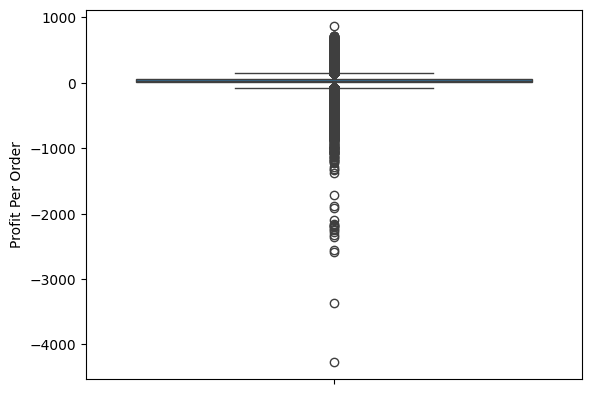

In [27]:
sns.boxplot(dfBase['Profit Per Order'])

In [28]:
upL1 = dfBase['Profit Per Order'].mean() + 3*dfBase['Profit Per Order'].std()
loL1 = dfBase['Profit Per Order'].mean() - 3*dfBase['Profit Per Order'].std()

print(upL1,loL1)

327.46683215432057 -285.1432828833352


In [29]:
len(dfBase[(dfBase['Profit Per Order']> upL1) | (dfBase['Profit Per Order'] < loL1)])

2035

<Axes: ylabel='Total Discount'>

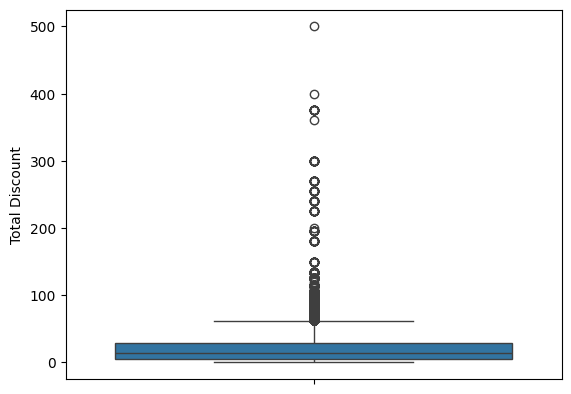

In [30]:
sns.boxplot(dfBase['Total Discount'])

In [34]:
dfBase['Total Discount']

0    0.0
Name: Total Discount, dtype: float64

In [31]:
upL1 = dfBase['Total Discount'].mean() + 3*dfBase['Total Discount'].std()
loL1 = dfBase['Total Discount'].mean() - 3*dfBase['Total Discount'].std()

print(upL1,loL1)

83.81196886263548 -44.12250427334368


In [32]:
len(dfBase[(dfBase['Total Discount']> upL1) | (dfBase['Total Discount'] < loL1)])

1093

In [ ]:
condition_de = (dfBase['Total Discount'] > 200000) & (dfBase['Total Discount'].notnull())
dfBase['Total Discount'] = dfBase['days_employed'].mask(condition_de, dfBase['Total Discount'].median())